Dataset: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset

In [1]:
!pip install kaggle -q

# ***Importing the dependencies***

In [2]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# ***Data Collection***

In [3]:
kaggle_config = json.load(open("/content/kaggle.json"))

In [4]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [5]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [6]:
# Loading the dataset using the kaggle API
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

kaggle.json  spotify-million-song-dataset.zip
sample_data  spotify_millsongdata.csv


In [8]:
with zipfile.ZipFile('/content/spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

# ***Reading the dataset***

In [9]:
df = pd.read_csv("/content/spotify_millsongdata.csv")

In [10]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [11]:
df.shape

(57650, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [13]:
df.isnull()

,artist,song,link,text
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
57645,False,False,False,False
57646,False,False,False,False
57647,False,False,False,False
57648,False,False,False,False


In [14]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [15]:
# Top Artists and Songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [16]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop = True)
df.head()

,artist,song,text
0,Jackson Browne,FOURTH AND MAIN,I'm here at Fourth and Main \r\nBeen standing...
1,Soundgarden,Uncovered,Small creature are you \r\nSmall creature you...
2,Diana Ross,Big Mable Murphy,"Way back in '29, 1929, somewhere in Coffeevill..."
3,Aerosmith,Mother Popcorn,"Some like 'em short, some like 'em tall \r\nS..."
4,Eurythmics,Spiritual Love,Spiritual love spiritual love spiritual love ...


In [17]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

### WordCloud to visualize the most common words in the lyrics

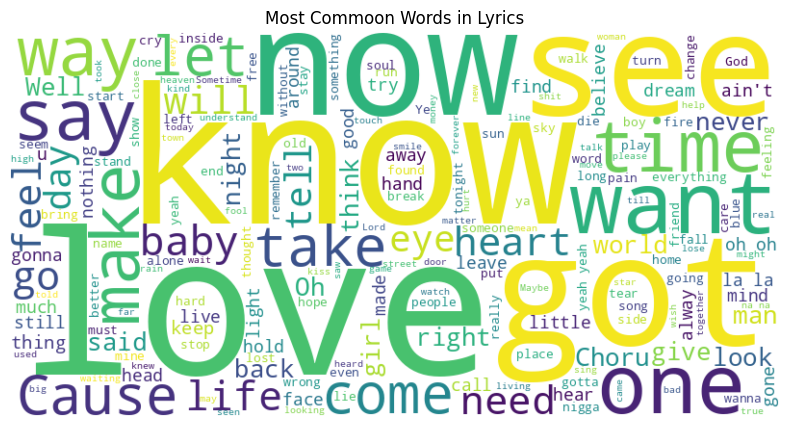

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Commoon Words in Lyrics")
plt.show()

# ***Data Preprocessing***

In [19]:
# Download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
def preprocess_text(text):
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z]', "", text)
  # Convert to lowercase
  text = text.lower()
  # Tokenize and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  # Join the tokens back into a single string
  return " ".join(tokens)

In [22]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [23]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [24]:
df.head()

,artist,song,text,cleaned_text
0,Jackson Browne,FOURTH AND MAIN,I'm here at Fourth and Main \r\nBeen standing...,imhereatfourthandmainbeenstandingintherainifee...
1,Soundgarden,Uncovered,Small creature are you \r\nSmall creature you...,smallcreatureareyousmallcreatureyouarehowquick...
2,Diana Ross,Big Mable Murphy,"Way back in '29, 1929, somewhere in Coffeevill...",waybackinsomewhereincoffeevillewasahonkytonkna...
3,Aerosmith,Mother Popcorn,"Some like 'em short, some like 'em tall \r\nS...",somelikeemshortsomelikeemtallsomelikeemthinski...
4,Eurythmics,Spiritual Love,Spiritual love spiritual love spiritual love ...,spirituallovespirituallovespirituallovethatswh...


In [25]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [26]:
# Recommendation Function
def recommend_song(song_name, cosine_sim = cosine_sim, df = df, top_n = 5):
  # Find the index of the song
  idx = df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) == 0:
    return "Song not found in the dataset."        # Can be reworked to compare for songs not present in the dataset
  idx = idx[0]

  # Get similarity scores
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
  sim_scores = sim_scores[1 : top_n+1]

  # Get song indices
  song_indices = [i[0] for i in sim_scores]

  # Return top n similar songs
  return df[['artist', 'song']].iloc[song_indices]

In [27]:
df["song"][2]

'Big Mable Murphy'

In [30]:
  # Example Recommendation
  print("\nRecommendations for the song 'Blinded By Rainbows':")
  recommendations = recommend_song("Big Mable Murphy")
  print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
        artist                   song
1  Soundgarden              Uncovered
2   Diana Ross       Big Mable Murphy
3    Aerosmith         Mother Popcorn
4   Eurythmics         Spiritual Love
5    Hank Snow  Conscience I'm Guilty
